In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import Data
df = pd.read_csv('taxi.csv')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


## Checking Missing Value

In [3]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

There is 1 Missing Value on "passenger_count" column

## Handling Missing Value

In [4]:
df.dropna(inplace=True)

## Data Types Conversion

In [5]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

"pickup_datetime" data type is object. Therefore, it need to be converted to be datetime.

In [6]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [7]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

"pickup_datetime" data type has been converted into datetime.

## Data Describe

In [8]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000
mean,11.289221,-72.486834,39.925272,-72.498734,39.913116,1.657205
std,9.551667,10.503808,6.715228,10.461670,6.160671,1.282236
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992223,40.734687,-73.991233,40.734589,1.000000
50%,8.500000,-73.981758,40.752620,-73.980234,40.753566,1.000000
75%,12.500000,-73.966788,40.767427,-73.963834,40.768067,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


There are no abnormalities found while describing the data.

## Data Preparation

### Features Extraction

##### Datetime Extract

In [9]:
pickup_dt = df['pickup_datetime'].dt

In [10]:
df['year'] = pickup_dt.year ## Extract Year
df['month'] = pickup_dt.month ## Extract Month
df['day'] = pickup_dt.day ## Extract Day
df['hour'] = pickup_dt.hour ## Extract Hour

In [11]:
df.drop(columns='pickup_datetime', inplace=True)

#### Simplify Distance

In [12]:
df['distance'] = abs((df['pickup_longitude'] - df['dropoff_longitude']) + (df['pickup_latitude'] - df['dropoff_latitude']))

#### Drop Some Columns

In [13]:
df.drop(columns=['pickup_longitude', 'dropoff_longitude', 'pickup_latitude', 'dropoff_latitude'], inplace=True)

In [14]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009,6,15,17,0.006340
1,16.9,1.0,2010,1,5,16,0.107481
2,5.7,2.0,2011,8,18,0,0.019212
3,7.7,1.0,2012,4,21,4,0.020512
4,5.3,1.0,2010,3,9,7,0.027194


## Machine Learning Modelling

### Splitting Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns='fare_amount')
y = df['fare_amount']

We're going to splitting data, using 80% train data and 20% test data.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

After splitting, we want to know the shape of array from each train and test.

In [18]:
X_train.shape

(15134, 6)

In [19]:
X_test.shape

(3784, 6)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Model Training

### Base Model

- Linear Regression

In [23]:
model_LR = LinearRegression(fit_intercept=False)

In [24]:
model_LR.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

To make the code reusable, we build a def function for several training and test set.

In [25]:
def Eva_Matrix_DF(Model, X_train, X_test, y_train, y_test, Name):
    y_pred_tr = Model.predict(X_train)
    R2_train = r2_score(y_train, y_pred_tr)
    MAE_train = mean_absolute_error(y_train, y_pred_tr)
    MSE_train = mean_squared_error(y_train, y_pred_tr)
    RMSE_train = np.sqrt(MSE_train)
    y_pred_ts = Model.predict(X_test)
    R2_test = r2_score(y_test, y_pred_ts)
    MAE_test = mean_absolute_error(y_test, y_pred_ts)
    MSE_test = mean_squared_error(y_test, y_pred_ts)
    RMSE_test = np.sqrt(MSE_test)
    eva_data = {
    "Training" + Name : [R2_train, MAE_train, MSE_train, RMSE_train],
    "Testing" + Name : [R2_test, MAE_test, MSE_test, RMSE_test],
    }
    df = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])
    
    
    return df

In [26]:
df_LinReg = Eva_Matrix_DF(model_LR, X_train, X_test, y_train, y_test, "LinReg")

In [27]:
df_LinReg

,TrainingLinReg,TestingLinReg
R2,0.002098,0.003646
MAE,6.009636,5.797353
MSE,92.537199,84.887955
RMSE,9.619626,9.213466


- Regularization - Ridge

In [28]:
model_R = Ridge()

In [29]:
model_R.fit(X_train, y_train)

Ridge()

In [30]:
df_Ridge = Eva_Matrix_DF(model_R, X_train, X_test, y_train, y_test, "Ridge")

In [31]:
df_Ridge

,TrainingRidge,TestingRidge
R2,0.016497,0.015320
MAE,5.939669,5.741382
MSE,91.201938,83.893358
RMSE,9.549971,9.159332


- Regularization - ElasticNet

In [32]:
model_E = ElasticNet()

In [33]:
model_E.fit(X_train, y_train)

ElasticNet()

In [34]:
df_Enet = Eva_Matrix_DF(model_E, X_train, X_test, y_train, y_test, "ElasticNet")

In [35]:
df_Enet

,TrainingElasticNet,TestingElasticNet
R2,0.014307,0.013402
MAE,5.951970,5.747787
MSE,91.404987,84.056782
RMSE,9.560596,9.168249


- Regularization - Lasso

In [51]:
model_L = Lasso()

In [53]:
model_L.fit(X_train, y_train)

Lasso()

In [54]:
df_Lasso = Eva_Matrix_DF(model_L, X_train, X_test, y_train, y_test, "Lasso")

In [55]:
df_Lasso

,TrainingLasso,TestingLasso
R2,0.011611,0.010255
MAE,5.965405,5.757775
MSE,91.654968,84.324860
RMSE,9.573660,9.182857


## Evaluation Matrix Comparison

In [50]:
pd.concat([df_LinReg, df_Ridge, df_Lasso, df_Enet], axis=1).T

,R2,MAE,MSE,RMSE
TrainingLinReg,0.002098,6.009636,92.537199,9.619626
TestingLinReg,0.003646,5.797353,84.887955,9.213466
TrainingRidge,0.016497,5.939669,91.201938,9.549971
TestingRidge,0.015320,5.741382,83.893358,9.159332
TrainingLasso,0.011611,5.965405,91.654968,9.573660
TestingLasso,0.010255,5.757775,84.324860,9.182857
TrainingElasticNet,0.014307,5.951970,91.404987,9.560596
TestingElasticNet,0.013402,5.747787,84.056782,9.168249


## Optimizing Machine Learning Model

- Using Feature Engineering (Polynomial - Power Transformer)

In [56]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

We want to create ML model with Polynomial Features

In [57]:
poly = PolynomialFeatures(degree=3, include_bias = False)

We want to create ML model with Power Transformer

In [58]:
yeo_pow = PowerTransformer('yeo-johnson')

In [59]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009,6,15,17,0.006340
1,16.9,1.0,2010,1,5,16,0.107481
2,5.7,2.0,2011,8,18,0,0.019212
3,7.7,1.0,2012,4,21,4,0.020512
4,5.3,1.0,2010,3,9,7,0.027194


Then, we extract some continuous features

In [60]:
num_col = df[['passenger_count', 'distance', 'year']]

In [61]:
num_poly = poly.fit_transform(num_col)

In [62]:
num_pow = yeo_pow.fit_transform(num_poly)

In [63]:
num_pow

array([[-5.41041960e-01, -1.05323617e+00, -1.93067784e-13, ...,
        -1.18486758e+00, -7.17413724e-01,  4.22772928e-13],
       [-5.41041960e-01,  1.87884638e+00, -1.27398092e-13, ...,
         1.66386404e+00,  1.21254575e+00,  4.26325641e-13],
       [ 9.14193759e-01, -3.77609129e-01, -6.18394225e-14, ...,
        -3.82918519e-01, -7.30113075e-02,  4.29878355e-13],
       ...,
       [-5.41041960e-01, -6.25738617e-01,  1.33948408e-13, ...,
        -7.19249312e-01, -2.60688471e-01,  4.40314452e-13],
       [-5.41041960e-01, -1.07303399e+00,  1.99007477e-13, ...,
        -1.19943643e+00, -7.43065590e-01,  4.43867165e-13],
       [-5.41041960e-01, -3.22180680e-01, -6.18394225e-14, ...,
        -3.06516870e-01, -3.45565793e-02,  4.29878355e-13]])

Transform the array into Data Frame

In [64]:
df_pow = pd.DataFrame(num_pow)

In [65]:
df_pow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.541042,-1.053236,-1.930678e-13,-0.600677,-1.081936,-0.514831,-0.495979,-0.882452,-1.869616e-13,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,4.227729e-13
1,-0.541042,1.878846,-1.273981e-13,-0.600677,1.278273,-0.514100,1.767568,1.333108,-1.860734e-13,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,4.263256e-13
2,0.914194,-0.377609,-6.183942e-14,1.185880,0.003999,0.577272,-0.420281,-0.076170,-1.852962e-13,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,4.298784e-13
3,-0.541042,-0.316858,3.552714e-15,-0.600677,-0.547070,-0.512641,-0.408462,-0.025478,-1.845191e-13,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,4.333200e-13
4,-0.541042,-0.023812,-1.273981e-13,-0.600677,-0.326710,-0.514100,-0.335893,0.193551,-1.860734e-13,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,4.263256e-13


And then, we combine the original features and transformed features using concat

In [66]:
df_1 = pd.concat([df.drop(columns=['passenger_count', 'distance', 'year']), df_pow], axis=1)
df_1.head()

,fare_amount,month,day,hour,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,4.5,6,15,17,-0.541042,-1.053236,-1.930678e-13,-0.600677,-1.081936,-0.514831,...,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,4.227729e-13
1,16.9,1,5,16,-0.541042,1.878846,-1.273981e-13,-0.600677,1.278273,-0.514100,...,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,4.263256e-13
2,5.7,8,18,0,0.914194,-0.377609,-6.183942e-14,1.185880,0.003999,0.577272,...,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,4.298784e-13
3,7.7,4,21,4,-0.541042,-0.316858,3.552714e-15,-0.600677,-0.547070,-0.512641,...,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,4.333200e-13
4,5.3,3,9,7,-0.541042,-0.023812,-1.273981e-13,-0.600677,-0.326710,-0.514100,...,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,4.263256e-13


Splitting Data

In [67]:
X_1 = df_1.drop(columns='fare_amount')
y_1 = df_1['fare_amount']

We're going to splitting data, using 85% train data and 15% test data.

In [68]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, train_size=.85, random_state=42)

In [69]:
model, df_LinReg2 = Eva_Matrix_Base(LinearRegression(fit_intercept=False),
                            X_train_1, X_test_1, y_train_1, y_test_1,
                            "LinReg 2")
df_LinReg2

,TrainingLinReg 2,TestingLinReg 2
R2,0.498710,0.513401
MAE,3.578229,3.437472
MSE,46.280579,41.335499
RMSE,6.802983,6.429269


In [70]:
df_LinReg

,TrainingLinReg,TestingLinReg
R2,0.002098,0.003646
MAE,6.009636,5.797353
MSE,92.537199,84.887955
RMSE,9.619626,9.213466


- Using Feature Engineering (Polynomial - Power Transformer)

In [72]:
## Ridge
model_R, df_Ridge2 = Eva_Matrix_Base(Ridge(), X_train_1, X_test_1, y_train_1, y_test_1, "Ridge")
df_Ridge2

,TrainingRidge,TestingRidge
R2,0.486179,0.498328
MAE,3.639472,3.516353
MSE,47.437522,42.615923
RMSE,6.887490,6.528087


In [73]:
## Lasso
model_L, df_Lasso2 = Eva_Matrix_Base(Lasso(), X_train_1, X_test_1, y_train_1, y_test_1, "Lasso")
df_Lasso2

,TrainingLasso,TestingLasso
R2,0.418618,0.431352
MAE,3.903154,3.741667
MSE,53.674974,48.305417
RMSE,7.326321,6.950210


In [74]:
## ElasticNet
model_E, df_Enet2 = Eva_Matrix_Base(ElasticNet(), X_train_1, X_test_1, y_train_1, y_test_1, "Enet")
df_Enet2

,TrainingEnet,TestingEnet
R2,0.409752,0.418252
MAE,3.975754,3.823235
MSE,54.493488,49.418263
RMSE,7.381970,7.029812


In [75]:
pd.concat([df_LinReg2, df_Ridge2, df_Lasso2, df_Enet2], axis=1).T

,R2,MAE,MSE,RMSE
TrainingLinReg 2,0.498710,3.578229,46.280579,6.802983
TestingLinReg 2,0.513401,3.437472,41.335499,6.429269
TrainingRidge,0.486179,3.639472,47.437522,6.887490
TestingRidge,0.498328,3.516353,42.615923,6.528087
TrainingLasso,0.418618,3.903154,53.674974,7.326321
TestingLasso,0.431352,3.741667,48.305417,6.950210
TrainingEnet,0.409752,3.975754,54.493488,7.381970
TestingEnet,0.418252,3.823235,49.418263,7.029812


- Regularization - Manual Tuning

First, we need to determine the parameters (In this case Alpha and Beta) 

In [77]:
Alpha = np.arange(0, 0.2, 0.0001)

To make the code reusable for tuning, we build a def function for several training and test set.

In [78]:
def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []
    
    for i in Alpha:
        model_R = Model(alpha=i)
        model_R.fit(X_train, y_train)
        y_pred_tr = model_R.predict(X_train)
        R2_train = r2_score(y_train, y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)
    return train_r, test_r

In [79]:
## Run function for Ridge
train_ridge, test_ridge = Manual_Tune(Alpha, X_train_1, X_test_1, y_train_1, y_test_1, Ridge)

Ridge Manual Tuning Visualization

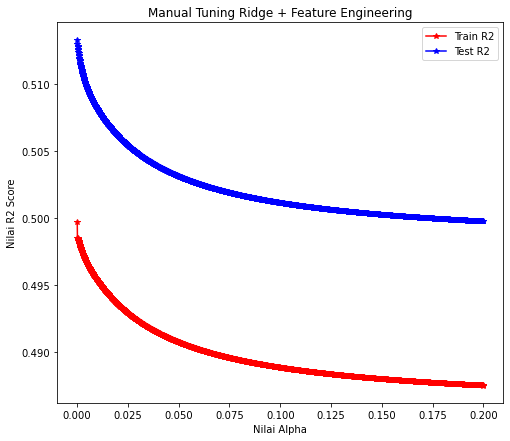

In [80]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_ridge, 'r*-')
plt.plot(Alpha, test_ridge, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Feature Engineering")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

In [81]:
## Run function for Lasso
train_Lasso, test_Lasso = Manual_Tune(Alpha, X_train_1, X_test_1, y_train_1, y_test_1, Lasso)

Lasso Manual Tuning Visualization

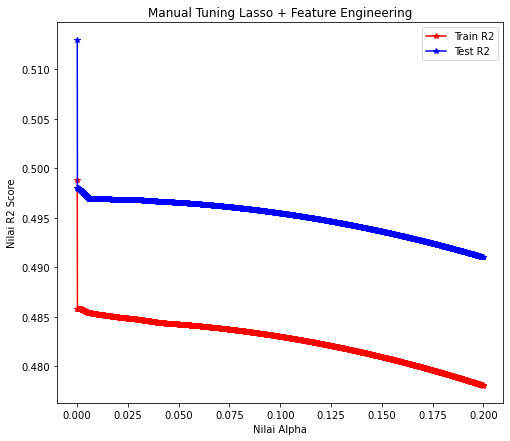

In [82]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Lasso, 'r*-')
plt.plot(Alpha, test_Lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Feature Engineering")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

We are doing some trial-error to determine the parameter for ElasticNet

In [83]:
beta = np.arange(0, 5, 0.001)

In [84]:
## Run function for Lasso
train_Enet, test_Enet = Manual_Tune(beta, X_train_1, X_test_1, y_train_1, y_test_1, ElasticNet)

ElasticNet Manual Tuning Visualization

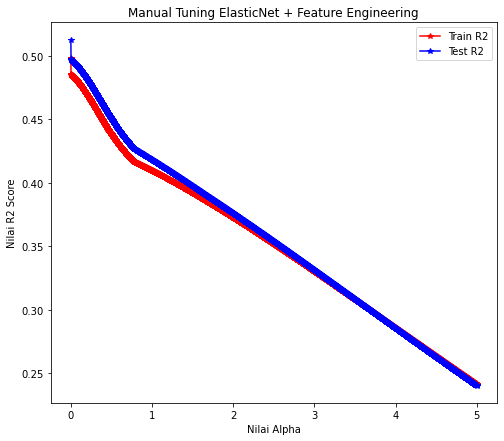

In [85]:
plt.figure(figsize=(8,7))
plt.plot(beta, train_Enet, 'r*-')
plt.plot(beta, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning ElasticNet + Feature Engineering")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

In [86]:
## Maximum R2 score for ElasticNet
np.max(test_Enet)

0.5129769184571492

In [87]:
## Maximum R2 score for Ridge
np.max(test_ridge)

0.5132790584120475

In [88]:
## Maximum R2 score for Lasso
np.max(test_Lasso)

0.5129769184571492

## Error Analysis

In [89]:
## Copy train features
df_Error_T = X_train_1.copy()

In [90]:
## Show train features
df_Error_T.head()

,month,day,hour,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,18
2760,11,5,0,1.486464,0.398102,1.339484e-13,1.621540,1.361174,1.290893,-0.173363,...,1.650726,1.836283,1.326778,0.219215,1.008321,1.284311,-0.165234,0.585840,0.397484,4.403145e-13
13436,1,8,11,-0.541042,1.402966,1.990075e-13,-0.600677,0.836347,-0.510453,0.742482,...,-0.623728,0.266931,-0.511496,0.451858,0.702968,-0.510080,0.060335,1.399278,0.931242,4.438672e-13
5746,10,2,10,-0.541042,-0.510040,-6.183942e-14,-0.600677,-0.689840,-0.513370,-0.442731,...,-0.623728,-0.724143,-0.513158,-0.495711,-0.380397,-0.515713,-0.195099,-0.564949,-0.170137,4.298784e-13
5998,12,21,22,-0.541042,1.104164,1.339484e-13,-0.600677,0.576665,-0.511182,0.353108,...,-0.623728,0.076120,-0.511911,0.142354,0.554207,-0.511488,-0.055877,1.200967,0.769368,4.403145e-13
6896,9,3,17,2.048708,-0.420993,1.339484e-13,1.850170,1.305313,2.646804,-0.428121,...,1.821082,2.155690,2.487433,-0.182675,0.974306,2.703028,-0.194136,-0.441866,-0.102070,4.403145e-13


In [91]:
## Adding 'target' train set as a new column
df_Error_T['target'] = y_train_1

In [92]:
df_Error_T.head()

,month,day,hour,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,target
2760,11,5,0,1.486464,0.398102,1.339484e-13,1.621540,1.361174,1.290893,-0.173363,...,1.836283,1.326778,0.219215,1.008321,1.284311,-0.165234,0.585840,0.397484,4.403145e-13,11.50
13436,1,8,11,-0.541042,1.402966,1.990075e-13,-0.600677,0.836347,-0.510453,0.742482,...,0.266931,-0.511496,0.451858,0.702968,-0.510080,0.060335,1.399278,0.931242,4.438672e-13,30.33
5746,10,2,10,-0.541042,-0.510040,-6.183942e-14,-0.600677,-0.689840,-0.513370,-0.442731,...,-0.724143,-0.513158,-0.495711,-0.380397,-0.515713,-0.195099,-0.564949,-0.170137,4.298784e-13,4.90
5998,12,21,22,-0.541042,1.104164,1.339484e-13,-0.600677,0.576665,-0.511182,0.353108,...,0.076120,-0.511911,0.142354,0.554207,-0.511488,-0.055877,1.200967,0.769368,4.403145e-13,16.00
6896,9,3,17,2.048708,-0.420993,1.339484e-13,1.850170,1.305313,2.646804,-0.428121,...,2.155690,2.487433,-0.182675,0.974306,2.703028,-0.194136,-0.441866,-0.102070,4.403145e-13,7.00


Determine the best parameter (Alpha) from Manual Tuning

In [93]:
best_a = Alpha[np.argmax(test_ridge)]

Build the new model using best Alpha

In [95]:
Model_R = Ridge(alpha=best_a)

In [96]:
Model_R.fit(X_train_1, y_train_1)

Ridge(alpha=0.0)

Predict with the New Model

In [105]:
pred_train = Model_R.predict(X_train_1)

In [106]:
df_Error_T['prediction'] = pred_train

In [110]:
## Adding error column by calculating the deviation between actual and predicted target
df_Error_T['Error'] = abs(df_Error_T['target'] - df_Error_T['prediction'])

Visualization of Distribution of Error

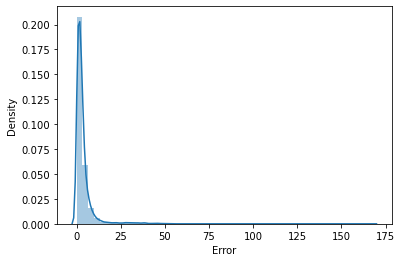

In [108]:
sns.distplot(df_Error_T['Error'])
plt.show()

Visualization of the relation between actual and error

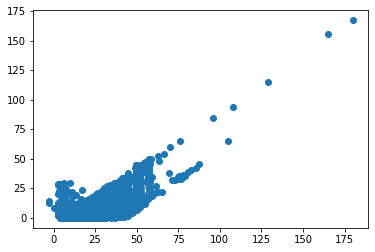

In [109]:
plt.scatter(df_Error_T['target'], df_Error_T['Error'])
plt.show()